While seeing some "sell in may" headlines a while ago, thought i’d pull up the monthly mean returns for spx and vix. I wanted to see them on an even keel, so that each month starts at 0%, to better observe the monthly behaviour

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import quandl
import calendar

%matplotlib inline
sns.set(style="whitegrid")

In [22]:
spx = pd.read_csv("../Data/Spx.csv", index_col="Date")
spx.index = pd.to_datetime(spx.index, format="%Y-%m-%d")
spx = spx.apply(pd.to_numeric, errors="coerce")

vix = pd.read_csv("../Data/Vix.csv", index_col="Date")
vix.index = pd.to_datetime(vix.index, format="%Y-%m-%d")
vix = vix.apply(pd.to_numeric, errors="coerce")

Adding dates and stuff to dataframes

In [27]:
def DatesAndPct(df):
    df["day"] = df.index.dayofyear
    df["month"] = df.index.month
    df["year"] = df.index.year
    if "Adj Close" in df.columns:
        df["pct"] = np.log(df["Adj Close"]).diff()
    else:
        df["pct"] = np.log(df["Value"]).diff()
    return df

spx = DatesAndPct(spx)
vix = DatesAndPct(vix)

Making a function for plots and plotting e‘m all at once

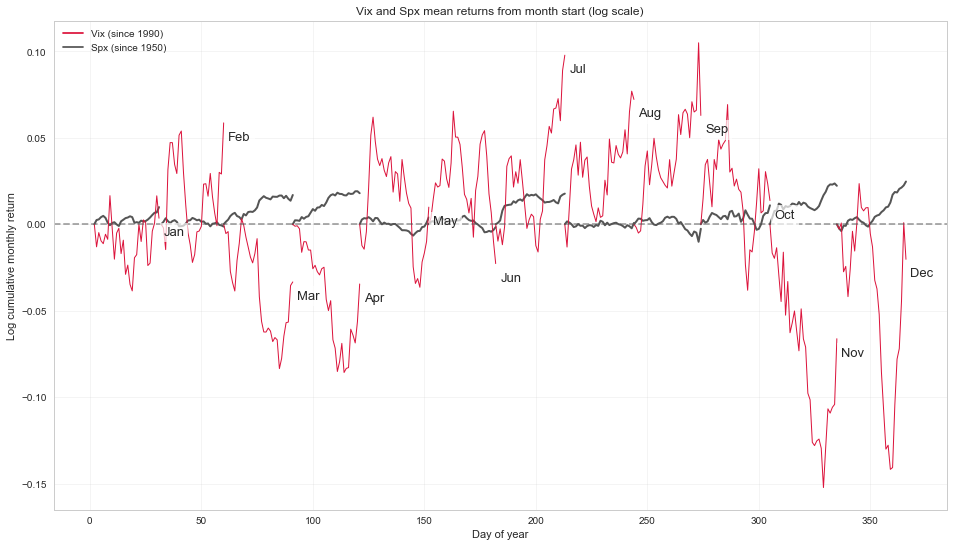

In [18]:
plt.figure(figsize=(16, 9))
label_props = dict(boxstyle="square", facecolor="w", edgecolor="none", alpha=0.69)

def plotMonths(df, color, line=1, m_names=True):
    df.index = pd.to_datetime(df.index, format="%Y-%m-%d")
    df.set_index(df["day"], inplace=True, drop=True)
    
    for i in range(1, 13):
        month_name = calendar.month_abbr[i] # Adding month name
    
        data = df[df["month"] == i]
        out = data["pct"].groupby(data.index).mean()
        out.iloc[0] = 0 # Setting returns to start from zero
    
        # Getting coordinates for month name labels
        x = out.index[-1]+2
        y = out.cumsum().iloc[-1]-0.01
    
        # Plotting
        plt.plot(out.cumsum(), linewidth=line, color=color, label="_nolabel_")
        if m_names == True:
            plt.text(x, y, month_name, size=13, bbox=label_props)


plotMonths(spx, "#555555", 2, m_names=False)
plotMonths(vix, "crimson", m_names=True)

plt.title("Vix and Spx mean returns from month start (log scale)")  
plt.plot([], [], label="Vix (since 1990)", color="crimson") # Adding custom legends
plt.plot([], [], label="Spx (since 1950)", color="#555555") # Adding custom legends
plt.axhline(linestyle="--", color="#555555", alpha=0.55)
plt.grid(alpha=0.21)
plt.legend(loc="upper left")
plt.xlabel("Day of year")
plt.ylabel("Log cumulative monthly return")

Thanks for your time